# Project Title - Edit Me


## Data set selection

> In this section, you will need to provide the following information about the selected data set:
>
> - Source with a link
https://data.world/markbradbourne/rwfd-real-world-fake-data/workspace/file?filename=Supply+Chain.xlsx

> - Fields
This dataset includes 7 different sheets. 
- Sheet: OrderList KeyFields: Order ID, Order Date, Origin Port, Carrier, TPT, Service Level, Ship ahead day count, Ship late day count, Customer,
Product ID, Plant Code, Destination Port, Unit Quantity, Weight
- Sheet: FreightRates KeyFields: Carrier, origin_port_cd, dest_port_cd, minm_wgh_qty, svs_cd, minimum cost, rate, mode_dsc, tpt_day_cnt, carrier type
- Sheet: WhCosts KeyFields: WH, Cost/Unit
- Sheet: WhCapabilites Keyfields: Plant ID, Daily Capacity
- Sheet: ProductsPerPlant Keyfieds: Plant Code, Product ID
- Sheet: VimiCustomers KeyFields: Plant Code, Customers
- Sheet: PlantPorts KeyFields: Plant Code, Port

> - License
The Real World Fake Data collection is available for education and non-commerical use. 

### Data set selection rationale

> Why did you select this data set?
- I choose this dataset because it provides realistic stimulated supply chain data that is easy to work with anaylsis and visualization. It will allow
me to explore how different parts of a supply chain affect delivery cost and delivery time. Evevn though the data is not real, it still reflects real business like situations and can help show data analysis can improve effciency and decision-making. 

### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
> This could include questions such as:
>
> - What is the relationship between X and Y variables?
> - What is the distribution of the variables?
> - What is the relationship between the variables and the target?
>   You will need to frame these questions in a way to show value to a stakeholder (i.e.why should we know about the relationship between X and Y variables?)

Questions: 
- Which Suppliers have the highest average lead times and shipping costs?
**Helps identify potential improvement areas for supplier performance

- Is there a measureable relationship between order quantity and total shipping cost?
**Determines whether larger orders produce cost savings

- How do delivery times vary across different regions or transport modes?
**Reveals problem areas in certain regions or shipping routes that cause delays and raise costs

- What trends exist in total delivery volumes sand average shipping costs over time?
**Shows how demand and work levels rise or fall during different times of the year

- Do busier warehouses have higher operating costs?
**Examines how changes in warehouse uses affect costs and overall efficeincy 

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.

-  bar chart: showing supplier vs. average lead time which would compare supplier effiency and highlight outliers
- heatmap: region vs. average shipping cost which would examine correlation and scaling effects
- line chart: month vs. (total deliveries, average cost) which would demonstrate seasonal trends
- boxplot: warehouse utilization vs. variable cost which would show cost variability across capacity levels
- historgram: lead times vs. number of orders showing delivery times spread across all orders
- interactive plotly dashboard: supplier and region filters, can explore delivery times and shipping costs by supplier or region

> Think about what those visualization could be: what are the variables used in the charts? what insights do you hope to gain from them?
- Each visualization will focus on showing how costs, delivery times, and performance differ across suppliers, regions, and time. The charts will use variables such as supplier name, region, shipping cost, lead time, and order quantity. From these visuals, I hope to identify which suppliers or regions are less efficient, find patterns in delivery times, and see how costs change with order size or season. 


In [5]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("/Users/diyapatel/Desktop/SupplyChain.xlsx")
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())

       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

Here I define a function that safely loads my Excel file from the 'data' folder.  It uses a 'try/except' block
to handle missing files or bad sheets in a graceful manner


In [6]:
from pathlib import Path


def load_excel(path: Path, sheet: str) -> pd.DataFrame:
  """Load an Excel file from the given path and sheet name.

  Args:
      path (Path): The path to the Excel file.
      sheet (str): The name of the sheet to load.

  Returns:
      pd.DataFrame: The loaded DataFrame.
  """
  try:
    df = pd.read_excel(path, sheet_name=sheet)
    return df
  except FileNotFoundError:
    print(f"Error: The file at {path} was not found.")
    return pd.DataFrame()
  except ValueError:
    print(f"Error: The sheet '{sheet}' does not exist in the Excel file.")
    return pd.DataFrame()


df = load_excel(Path("data/SupplyChain.xlsx"), "OrderList")
print(df.head())

       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

Here I use built-in Python data structures in realistic ways. A set finds unqiue carriers, a dictionary maps region
names, and a list/tuple store the numeric variables for later analysis. 

In [7]:
def create_numeric_list() -> list[str]:
  """
  Create a list of numeric columns to analyze.

  Returns:
      list[str]: Names of numeric columms used for calculations.
  """
  return ["Unit quantity", "Weight"]


def create_correlation_pair() -> tuple[str, str]:
  """
  Create a tuple of column names to analyze correlation.

  Returns:
      tuple[str, str]: Column names for correlation testing .
  """
  return ("Unit quantity", "Weight")


def get_unique_carriers(dataframe: pd.DataFrame) -> set[str]:
  """ 
  Find all unique carriers within dataset.

  Args: 
       dataframe (pd.DataFrame): The supply chain dataset.

  Returns: 
       set[str]: A set of unique carrier names.
  """
  return set(dataframe["Carrier"])


def add_region_mapping(dataframe: pd.DataFrame) -> pd.DataFrame:
  """
  Map port codes to human-readable region names using a dictionary.

  Args:
      dataframe (pd.DataFrame): The supply chain dataset.

  Returns:
      pd.DataFrame: DataFrame with a new 'Region' column added.
  """
  region_map = {
      "PORT09": "Region A",
      "PORT02": "Region B",
      "PORT03": "Region C",
  }

  dataframe["Region"] = dataframe["Origin Port"].map(region_map)
  return dataframe


numeric_columns = create_numeric_list()
correlation_pair = create_correlation_pair()
unique_carriers = get_unique_carriers(df)
print(f"Number of unique carriers: {len(unique_carriers)}")

df = add_region_mapping(df)
df.head()

Number of unique carriers: 3


,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Region
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30,Region A
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94,Region A
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20,Region A
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16,Region A
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34,Region A


This step applies a vectorized calculation using numpy and pandas to find the weightt per shipped unit for each order. Vectorization makes the operation effieicient by applying the math to entire columns at once. 

In [8]:
import numpy as np

# Calculate weight per unit for each order
df['Weight per Unit'] = df['Weight'] / df['Unit quantity']

# check result
df[['Weight', 'Unit quantity', 'Weight per Unit']].head()

,Weight,Unit quantity,Weight per Unit
0,14.30,808,0.017698
1,87.94,3188,0.027585
2,61.20,2331,0.026255
3,16.16,847,0.019079
4,52.34,2163,0.024198


The groupby function used aggregates shipment data by carrier, giving the mean, standard deviation, and sample count of weight per unit. This will highlight which carriers typically handle heavier or lighter shipments.

In [9]:
# Summarize average weight per unit by carrier

carrier_summary = (
    df.groupby('Carrier')['Weight per Unit']
    .agg(['mean', 'std', 'count'])
    .reset_index()

)

carrier_summary.head()

,Carrier,mean,std,count
0,V444_0,0.014207,0.098897,6264
1,V444_1,0.018393,0.023451,2097
2,V44_3,0.019628,0.044718,854


Here I join the order-level dataset with the freight rate table to enhance each record with rate and mode information. The left merge ensures every order details are keeps its detials even if freight info is missing. 

In [10]:
# Load the Freight Rate table

freight_df = pd.read_excel("data/SupplyChain.xlsx", sheet_name="FreightRates")

# Merge by common column 'Carrier'

merged = df.merge(freight_df, on='Carrier', how='left')

merged.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The pivot table was intended to summarize the average weight per unit by month. However, after closley inspecting the data, I realized that the order date columns contains only a single unique data which is 2013-05-26.
Because of this, the table only shows one row of data instead of a full monthly time series. This is most likely due to the fact that the dataset is simulated. I will replace this visualization with a carrier or region trend comparison,
to explore operational patterns instead. 

In [34]:
# Convert order dates to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Average weight per unit by month pivot table
monthly_weight = df.pivot_table(
    values='Weight per Unit',
    index=df['Order Date'].dt.to_period('M'),
    aggfunc='mean'
).reset_index()


monthly_weight.rename(columns={'Order Date': 'Month'}, inplace=True)
monthly_weight.head()

,Month,Weight per Unit
0,2013-05,0.015662


Orignally, the pivot table above was supposed to summarize average weight per month to visualize monthly shipping trends. Since a time-series analysis would not provide any insight, I created a new pivot table to summarize total shipments handled by each carrier. This summary supports a carrier trend comparison.

In [ ]:
# Summarize total shipments by carrier pivot table

carrier_trend_pivot = (
    df.pivot_table(
        values="Order ID",
        index="Carrier",
        aggfunc="count"
    )
    .reset_index()
    .rename(columns={"Order ID": "Total Shipments"})
    .sort_values(by="Total Shipments", ascending=False)

)

carrier_trend_pivot.head()

,Carrier,Total Shipments
0,V444_0,6264
1,V444_1,2097
2,V44_3,854


This pivot table calcuates the average lead time (TPT) for each carrier. It helps identify which carriers have the longest or shortest average delivery times. 

In [12]:
# Analyze TPT by carrier

supplier_pivot = (
    df.pivot_table(
        values='TPT',
        index='Carrier',
        aggfunc='mean'
    )
    .reset_index()
    .sort_values(by='TPT', ascending=False)
)

supplier_pivot.head()

,Carrier,TPT
0,V444_0,1.998404
2,V44_3,1.289227
1,V444_1,1.053887


Below is a pivot table that summarizes the average weight per unit by region and carriers. It helps visualize how shipment efficiency differs across regions and suppliers. Each cell represents the average shipment weight handled
by a specific carrier in a specific region. 

In [13]:
# Analyze weight per unit by region and carrier

region_carrier_pivot = (
    df.pivot_table(
        values='Weight per Unit',
        index='Region',
        columns='Carrier',
        aggfunc='mean'
    )
    .round(3)
)

region_carrier_pivot.head()

Carrier,V444_0,V44_3
Region,,
Region A,0.389,0.104


To analyze warehouse efficiency and cost variability, I merged two related sheets, WhCosts and WhCapacities. By merging these two sheets on their shared warehouse/plant code I can compare warehouse utilization against
variable operating costs. 

In [61]:
# Merge warehouse cost and capacity sheets

wh_costs = pd.read_excel("data/SupplyChain.xlsx", sheet_name="WhCosts")
wh_capacities = pd.read_excel(
    "data/SupplyChain.xlsx", sheet_name="WhCapacities")

warehouse_merged = wh_costs.merge(
    wh_capacities, left_on="WH", right_on="Plant ID")

warehouse_merged["Capacity Group"] = pd.cut(
    warehouse_merged["Daily Capacity "], bins=[0, 100, 500, 1100],
    labels=["Small (0-100)", "Medium(100-500)", "Large(500+)"]
)
warehouse_merged.head()

,WH,Cost/unit,Plant ID,Daily Capacity,Capacity Group
0,PLANT15,1.415063,PLANT15,11,Small (0-100)
1,PLANT17,0.428947,PLANT17,8,Small (0-100)
2,PLANT18,2.036254,PLANT18,111,Medium(100-500)
3,PLANT05,0.488144,PLANT05,385,Medium(100-500)
4,PLANT02,0.477504,PLANT02,138,Medium(100-500)


This bar char shows the average delivery lead time (TPT) for each supplier. It helps identify which suppliers consistently have longer shipping times, which can indicate efficiency issues or potential delays.
The bar height represents have average lead time in days. Suppliers with taller bars are less efficient, while shorter bars indicate faster performance. I used a bar chart because it clearly compares suppliers against lead time, making
it easy to spot outliers or inefficiencies. 

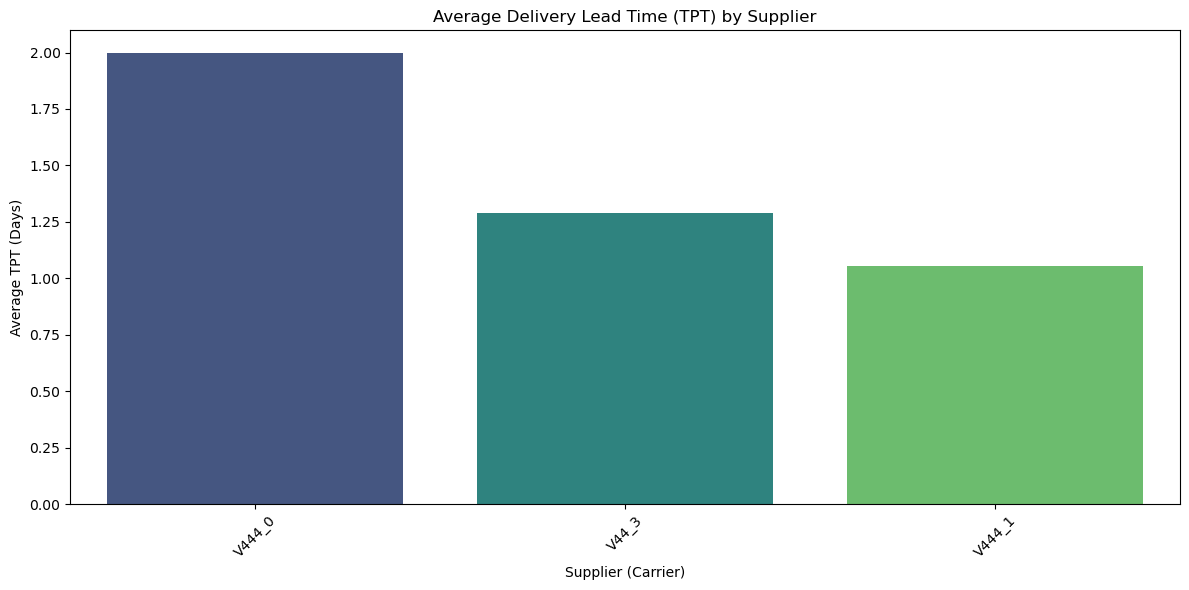

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart showing average TPT by supplier

plt.figure(figsize=(12, 6))
sns.barplot(data=supplier_pivot, x='Carrier',
            y='TPT', hue="Carrier", palette='viridis')
plt.title('Average Delivery Lead Time (TPT) by Supplier')

plt.xlabel('Supplier (Carrier)')
plt.ylabel('Average TPT (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This heatmap shows the average shipping cost across different regions and carriers. Darker colors indicate higher average costs, while lighter shades represent lower costs. By visualizing the data thos way, it's easy to spot which region-
supplier combinations tend to be more expensive or efficient. 

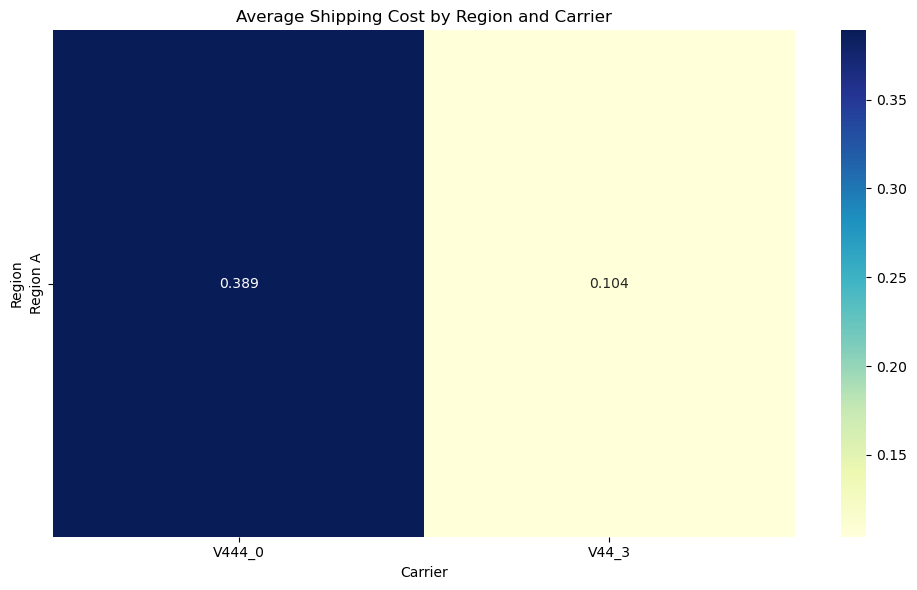

In [16]:
# Heatmap of average shipping cost by region and carrier

plt.figure(figsize=(10, 6))
sns.heatmap(region_carrier_pivot, annot=True, fmt=".3f", cmap='YlGnBu')

plt.title('Average Shipping Cost by Region and Carrier')
plt.xlabel('Carrier')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

Instead of the line chart, this bar chart uses the the pivot table to compare total shipment volumes by carrier. It reveals which suppliers handle more orders, reflecing operational workload and performance patterns. I chose the bar chart because it provides clear and direct comparison between carriers and makes it easy to tell which one handles the largest share of shipments. 

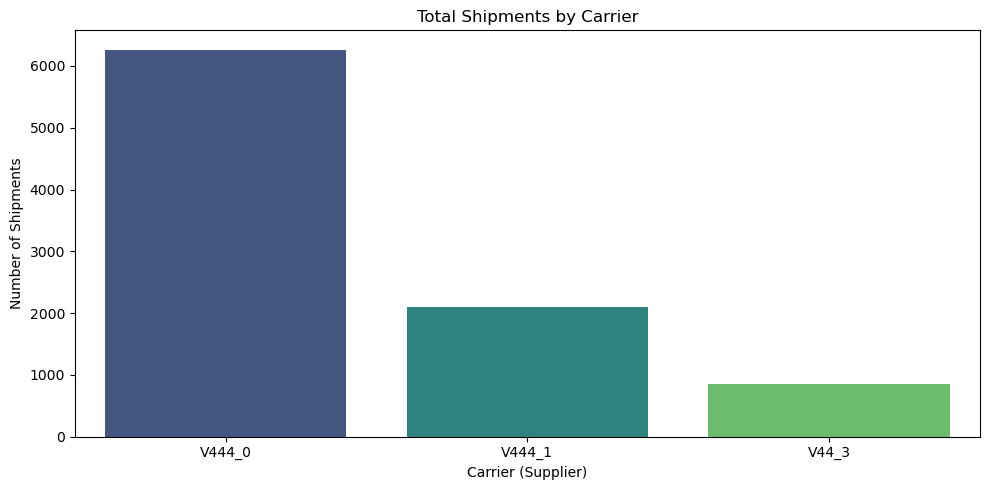

In [ ]:
# Bar chart of total shipments by carrier

plt.figure(figsize=(10, 5))
sns.barplot(data=carrier_trend_pivot, x='Carrier',
            y='Total Shipments', hue="Carrier", palette='viridis')
plt.title('Total Shipments by Carrier')

plt.xlabel('Carrier (Supplier)')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

This line was originally intented to visualize avg shipping weight per unit over time to identify monthly trends. Since there is only date in the dataset, there is no meaningful trend to present. If this dataset had included multiple months or years of order dates, the visualization could have shown patterns such as: seasonal peaks, changes in avg shipping weight across months, and performance changes. The line chart was included just to show the downside of using time-based visualizations. 

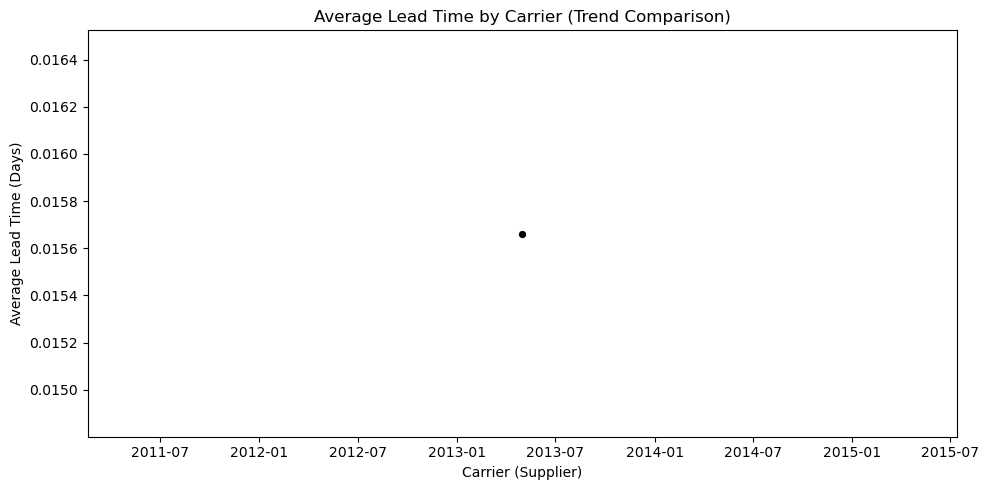

In [36]:
# Line chart of average shipping costs per unit by month
monthly_weight['Month'] = monthly_weight['Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_weight, x="Month",
             y="Weight per Unit", marker="o", color="black")
plt.title("Average Lead Time by Carrier (Trend Comparison)")

plt.xlabel("Carrier (Supplier)")
plt.ylabel("Average Lead Time (Days)")
plt.tight_layout()
plt.show()

This boxplot compares daily capacity with cost per unit across different warehouses. Each box shows how much the cost per unit flucuates for warehouse with a given capacity levels. Wider boxes indicate greater cost variability, while
narrow boxes show more consistent performance. This visualization helps assess whether larger or busier warehouses tend to havee higher operating costs. 

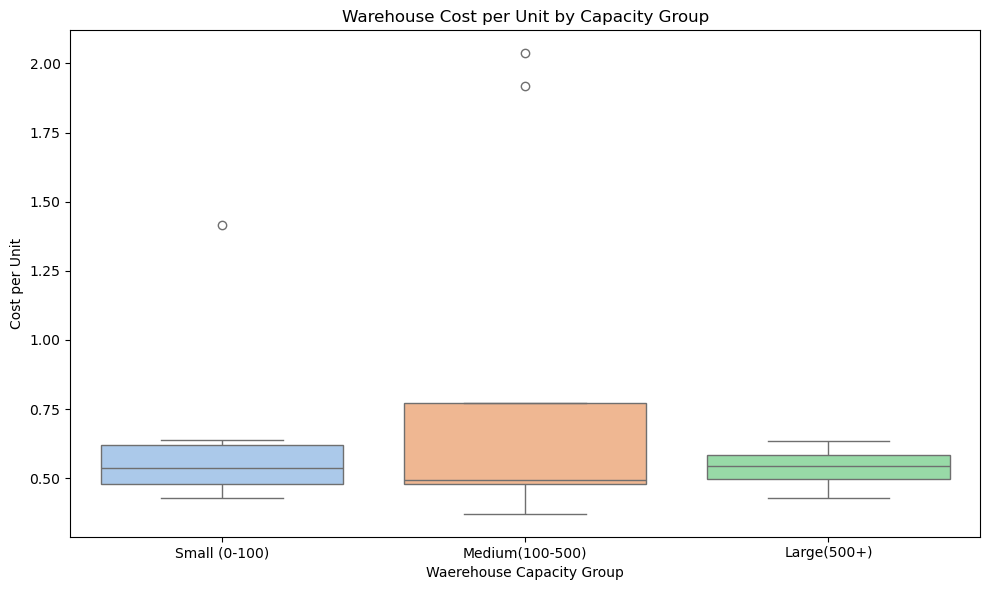

In [63]:
# Boxplot of daily capacity vs cost per unit by warehouse

plt.figure(figsize=(10, 6))
sns.boxplot(data=warehouse_merged, x="Capacity Group",
            y="Cost/unit", hue="Capacity Group", palette='pastel')
plt.title('Warehouse Cost per Unit by Capacity Group')
plt.xlabel('Waerehouse Capacity Group')
plt.ylabel('Cost per Unit')
plt.tight_layout()
plt.show()

This histogram shows how leaked time are distributed across all customer orders. Each bar represnets the number of orders that fall within a specific lead-time range. The KDE curve line helps visualize the overall shape of distribution, 
showing whether most deliveries are fast and consistent or if there any delays. 

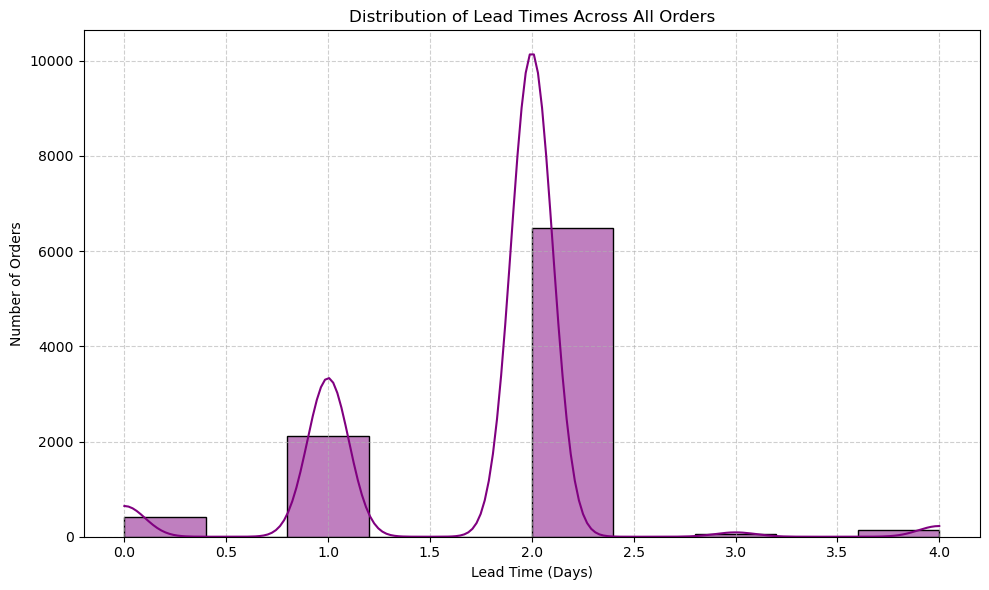

In [ ]:
# Histogram of lead time distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TPT', bins=10, kde=True, color='purple')
plt.title('Distribution of Lead Times Across All Orders')

plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This interactive Plotly chart allows users to explore delivery performance across suplliers and regions. By hovering, filtering, or zooming, users can examine key relationships such as lead time, shipping cost per unit, and regional trends. This visualization enables dynamic analysis, allowing users to focus on specific supplier or regions to identify inefficiencies, compare performance, or highlight outliers in delivery operations. The interactivity provides a more intuitive and engaging way to understand how logistics factors like cost, delivery time, and supplier region interact within thw supply chain. 

In [55]:
import plotly.express as px

fig = px.scatter(
    df,
    x="TPT",
    y="Weight per Unit",
    color="Region",
    hover_name="Carrier",
    title="Interactive Dashboard: Delivery Time vs. Shipping Cost by Supplier and Region",
    labels={
        "TPT": "Lead Time (Days)",
        "Weight per Unit": "Shipping Cost per Unit",
        "Region": "Region"
    },
)

fig.update_layout(
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
    legend_title="Region",
    template='plotly_white'
)

fig.show()